In [2]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
coffeeData = pd.read_csv('data/RRDinerCoffeeData.csv')

In [4]:
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [5]:
coffeeData.shape

(702, 9)

In [6]:
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [7]:
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


In [8]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [9]:
coffeeData.columns=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Online', 'Decision']

In [10]:
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [11]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [12]:
coffeeData.Gender.value_counts()

Male      355
Female    340
female      1
F           1
f           1
FEMALE      1
MALE        1
male        1
M           1
Name: Gender, dtype: int64

In [13]:
coffeeData.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [14]:
mapping={'female':'Female', 'F':'Female', 'f ':'Female', 'FEMALE':'Female', 'MALE':'Male', 'male':'Male',
       'M':'Male'}

coffeeData.Gender = coffeeData.Gender.replace(mapping)
coffeeData.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
coffeeData.Decision.value_counts()

1.0    303
0.0    171
Name: Decision, dtype: int64

In [16]:
coffeeData.Decision.unique()

array([ 1., nan,  0.])

In [17]:
mapping = {1:'Yes', 0:'No'}
coffeeData.Decision = coffeeData.Decision.replace(mapping)
coffeeData.Decision.value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

In [18]:
coffeeData.Decision.unique()

array(['Yes', nan, 'No'], dtype=object)

In [19]:
NOPrediction = coffeeData.dropna()
NOPrediction.Decision.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
coffeeData.Decision.unique()

array(['Yes', nan, 'No'], dtype=object)

In [21]:
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   salary                   474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


In [22]:
coffeeData.Decision.isnull().sum()

228

In [23]:
len(coffeeData)-coffeeData.Decision.value_counts().sum()

228

In [24]:
coffeeData.Decision.value_counts().sum()

474

In [25]:
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [26]:
features=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online']

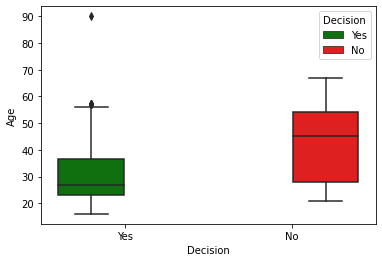

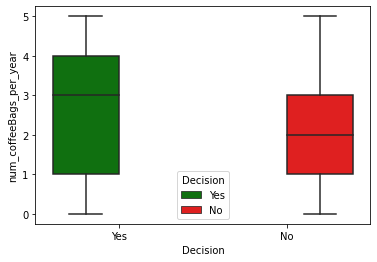

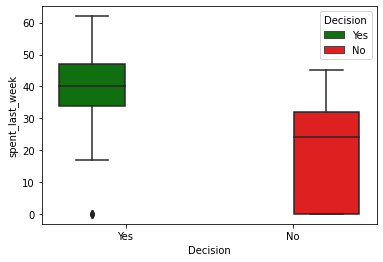

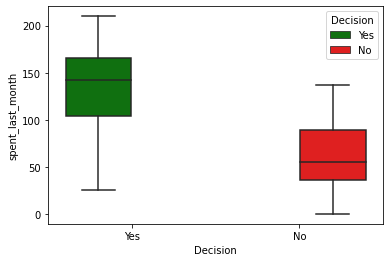

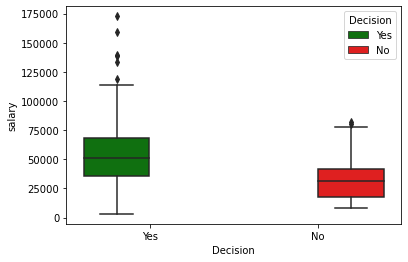

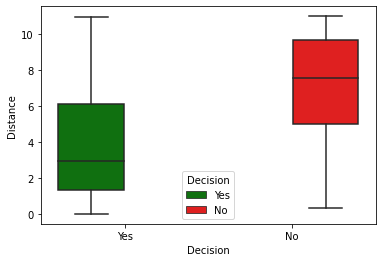

In [27]:
pali = ['g','r']

features_cont=['Age', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance']

for feature in features_cont:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();

In [28]:
NOPrediction.Gender.value_counts(normalize=True)

Female    0.508439
Male      0.491561
Name: Gender, dtype: float64

In [29]:
NOPrediction.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [30]:
coffeeData.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [31]:
set(features) - set(features_cont)

{'Gender', 'Online'}

In [32]:
type(set(features) - set(features_cont))

set

In [33]:
list(set(features) - set(features_cont))

['Online', 'Gender']

In [34]:
#won't work here! only for dicts? #although ironic cuz output of SET is curly braces so LOOKS like a dict!!
features.difference(features_cont)

AttributeError: 'list' object has no attribute 'difference'

In [35]:
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

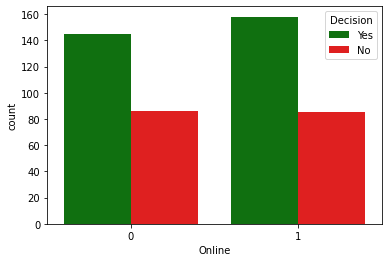

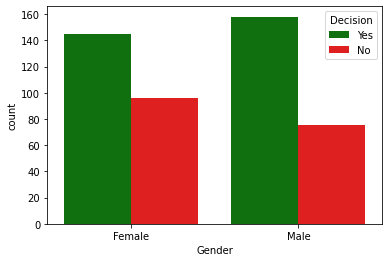

In [36]:
#OH! and then we can show the BINARY ones w/ a diff way! simple bar charts!

binary_features = list(set(features) - set(features_cont))

for binary_feature in binary_features:
    sns.countplot(data=NOPrediction,x=binary_feature, hue='Decision', palette=pali)
    plt.show()

#NOTE!!!! when X *IS* decision then we DON'T NEED HUE!!! just put in palette!!!
#BUT THEN THE ONLY DIFF IS YOU WON'T GET THAT NICE *LEGEND*!!!!

In [37]:
Prediction = coffeeData[coffeeData['Decision'].isnull()]
Prediction

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,0,52,55227,5.984716,0,NaN
677,67,Male,5,41,151,182058,6.288700,1,NaN
680,24,Female,5,62,205,55772,6.583449,1,NaN
682,33,Female,5,34,96,78058,6.723241,0,NaN


In [38]:
X = NOPrediction.drop('Decision',axis=1)
y = NOPrediction.Decision

In [39]:
X

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
0,36,Female,0,24,73,42789,0.003168,0
2,24,Male,0,39,119,30563,0.916005,1
4,24,Female,0,20,36,14244,0.965881,0
5,20,Female,0,23,28,14293,1.036346,1
6,34,Female,0,55,202,91035,1.134851,0
...,...,...,...,...,...,...,...,...
696,29,Female,5,20,74,29799,10.455068,0
697,45,Female,5,61,201,80260,10.476341,0
698,54,Male,5,44,116,44077,10.693889,1
699,63,Male,5,33,117,43081,10.755194,1


In [40]:
y

0      Yes
2      Yes
4      Yes
5      Yes
6      Yes
      ... 
696     No
697    Yes
698     No
699     No
701    Yes
Name: Decision, Length: 474, dtype: object

In [42]:
#keeping X's separate from y's since need it like that for train/test split!
X_dum = pd.get_dummies(X, columns = binary_features, drop_first=True)

X_dum

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online_1,Gender_Male
0,36,0,24,73,42789,0.003168,0,0
2,24,0,39,119,30563,0.916005,1,1
4,24,0,20,36,14244,0.965881,0,0
5,20,0,23,28,14293,1.036346,1,0
6,34,0,55,202,91035,1.134851,0,0
...,...,...,...,...,...,...,...,...
696,29,5,20,74,29799,10.455068,0,0
697,45,5,61,201,80260,10.476341,0,0
698,54,5,44,116,44077,10.693889,1,1
699,63,5,33,117,43081,10.755194,1,1


In [43]:
#we could've just converted Online to string yes/no too like we did with Decision,
#then it would've AUTOMATICALLY DETECTED IT and we could've left columns blank!
#gender is already fine cuz string!
#OR - since these are BOTH binary anyway, the other option is make them BOTH numerical
#binary 0/1, so Online already is, so could've converted male/female to 1/0 too!
#then wouldn't have to dummify???
#################################################

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=33)

In [45]:
X_train

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online_1,Gender_Male
450,25,3,54,170,51644,10.873763,1,1
129,23,1,21,51,80144,4.990330,1,1
565,59,4,30,112,69515,9.409150,1,1
341,16,3,31,70,3526,1.125406,1,0
523,23,4,41,148,59993,4.815908,1,0
...,...,...,...,...,...,...,...,...
193,35,1,0,41,16288,10.694807,0,0
101,54,1,51,165,56572,3.005885,0,0
307,53,2,39,129,44192,9.186539,0,1
568,40,4,25,95,71606,9.728074,0,0


In [46]:
y_train

450    Yes
129     No
565     No
341    Yes
523    Yes
      ... 
193     No
101    Yes
307     No
568     No
34      No
Name: Decision, Length: 355, dtype: object

In [47]:
X_train.shape

(355, 8)

In [48]:
NOPrediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,5.102898,0.512658
std,13.604135,1.585211,15.758109,56.101085,25567.674430,3.354891,0.500368
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,2.077965,0.000000
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,4.832168,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,7.869086,1.000000
max,90.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000


In [49]:
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [50]:
#oh! notice gender is missing cuz it's *TEXT* AND NOT NUMERICAL!
###############################################################################################

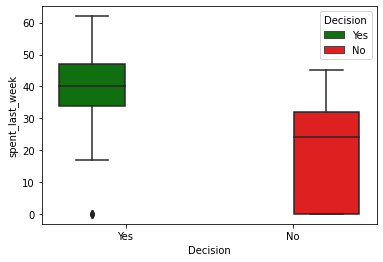

In [51]:
sns.boxplot(data=NOPrediction, x='Decision', y='spent_last_week', hue='Decision', palette=pali);

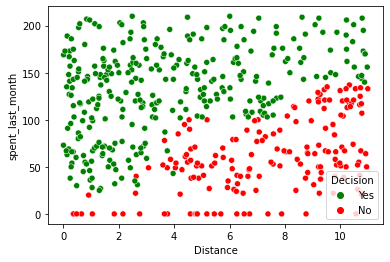

In [52]:
sns.scatterplot(data=NOPrediction, x='Distance', y='spent_last_month', hue='Decision', palette=pali);

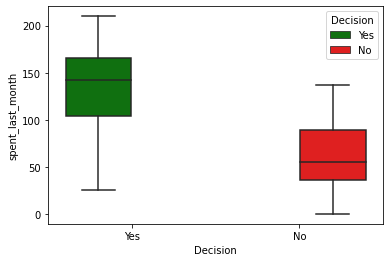

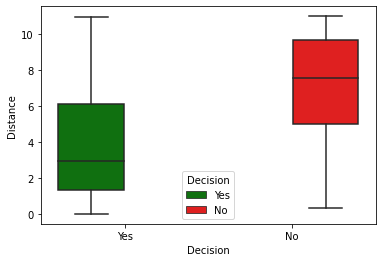

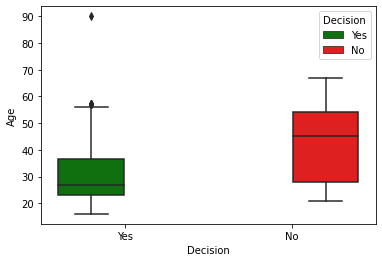

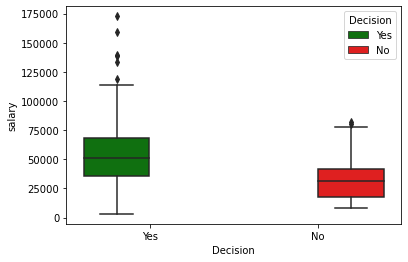

In [54]:
features_focus=['spent_last_month', 'Distance', 'Age', 'salary']

for feature in features_focus:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();

In [55]:
X_train[y_train=='No'].spent_last_month.max()

137

In [56]:
X_train[y_train=='Yes'].spent_last_month.median()

143.0

In [57]:
#do another one for IQRs!!!

In [58]:
####keep in mind that there's the OVERALL data, but then there's the TRAINING ONLY
#data that our model is gonna see and fit on, perfectly in fact in unrestrained /
#no max depth editions! thus, don't take the cuts/cutmarks TOO literally when you look
#at the decision tree cuz it DEPENDS WHAT POINTS *TRAINING* SPLIT GOT!!!!!!
#you can look at the boxplots & scatts of those separately if you want!
#here's a start:
# trainers = X_train.copy()
# trainers['Decision']=y_train
# trainers.head()
# sns.boxplot(data=trainers, x='Decision', y='Distance', hue='Decision', palette=pali);

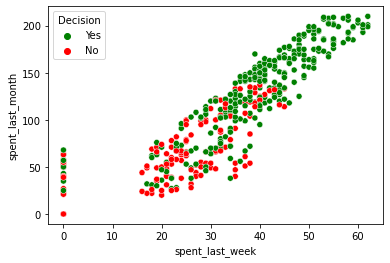

In [59]:
#more scatts!
sns.scatterplot(data=NOPrediction, x='spent_last_week', y='spent_last_month', hue='Decision', palette=pali);

In [60]:
#ahhhh interesting! so yeah, like we said, THESE TWO ARE PROBABLY/EXPECTEDLY
#HIGHLY CORRELATED!!! if you spent more last week, you probably spent more
#last MONTH! in some cases, last week WAS last month LOL!
#the separation you see is like the same you see in either ONE of them
#individually! aka the more you spent, the more likely you were to indicate Yes!

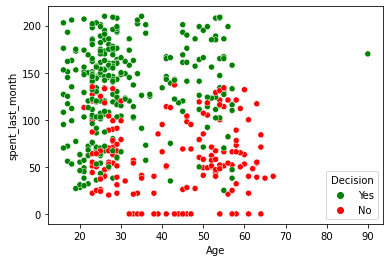

In [61]:
sns.scatterplot(data=NOPrediction, x='Age', y='spent_last_month', hue='Decision', palette=pali);

In [62]:
#hmm interesting! it's like an upside down 'L' shape! like square within a square!
#<age 23 & >$138 spent last month said Yes!!!

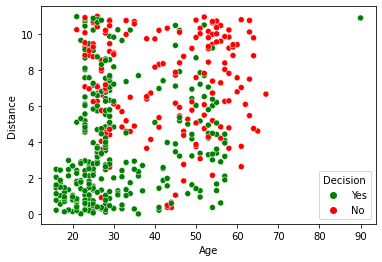

In [63]:
sns.scatterplot(data=NOPrediction, x='Age', y='Distance', hue='Decision', palette=pali);

In [64]:
#hmm interesting! like another L shape, but actually, mostly just the lower
#left block said yes! you can box that up w/ only a few exceptions!
#young & close!!!
#the youngest ALL said yes, and the closest ALMOST all said yes!!!
############################################################################

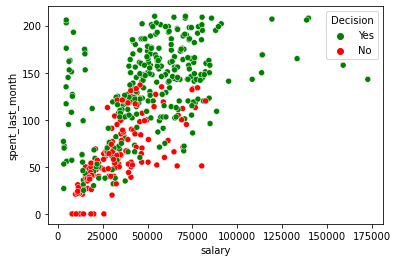

In [65]:
sns.scatterplot(data=NOPrediction, x='salary', y='spent_last_month', hue='Decision', palette=pali);

In [66]:
#okay so another 'L', the PISTOL FIGURE!!! so, from bottom left/origin,
#like angling up and right, then SHARP right turn lol, so basically, ENTIRE TOP block,
#without exception, so >$138 spent, *ALL* income brackets, regardless of how rich
#or poor, said yes! ppl are mostly in the 25k to 80k range to begin with;
#and then beneath that spenditure, interestingly it's the ones who make the LEAST
#that said yes!!! makes sense tho that the less they make, the less they tend
#to spend. lot of mixing, but the LOWEST earners said yes REGARDLESS OF HOW
#MUCH THEY SPENT! seems a little strange that even those who didn't spend anything
#in the last month were saying they would - but it was a mix; but as expected,
#it was more common to say NO then yes for the low SPENDERS, but perhaps
#more common to say yes than no for low EARNERS!!! but yeah, interestingly the
#LOWEST spenders said yes!? too happy-go-lucky lol

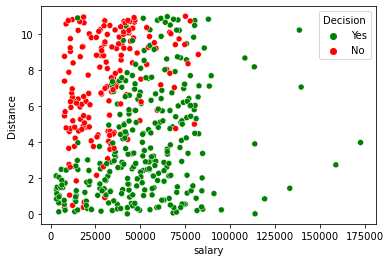

In [67]:
sns.scatterplot(data=NOPrediction, x='salary', y='Distance', hue='Decision', palette=pali);

In [68]:
#okay cool - pretty good division! NE/SW line! would have to do a pixely
#jagged back n forth chisel, up/right up/right lol TO BE UPRIGHT! upward & onward
#but everyone >$85k salary, without exception, said yes. and then that block/box
#to low-left of that line, like down to $35k salary and up to 4.1miles distance!

In [69]:
from sklearn.tree import DecisionTreeClassifier
entr_model = DecisionTreeClassifier(criterion='entropy')
#max_depth default is None which is what we want!

# Call fit() on entr_model
entr_model.fit(X_train,y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# See how we did
entr_model.score(X_test,y_test)

0.9495798319327731

In [70]:
entr_model.score(X_train,y_train)

1.0

In [71]:
#####################################################################################
#OHHHHH DAANNNNNNNNGGGGGG DANIYAALLLL!!!!! sA so IT ACTUALLY DID COMPLETELY OVERFIT!!!
#YET, DIDN'T SEEM TO BE AN ISSUE CUZ STILL GOT AMAZING SCORE!!!! sA!!!!! DIDN'T EVEN DO
#OTHER TREES/ENSEMBLE/FOREST!!!!! no tweakers/averaging!!!! is this just a really easy case!?
#so THAT'S WHY ENTROPY WAS 0 IN EACH LEAF/FINAL BUCKET!!!
#####################################################################################

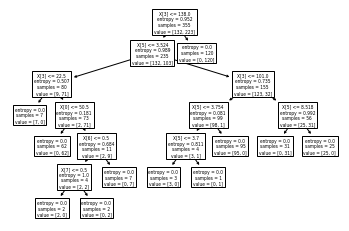

In [72]:
#plain vanilla
from sklearn import tree
tree.plot_tree(entr_model);

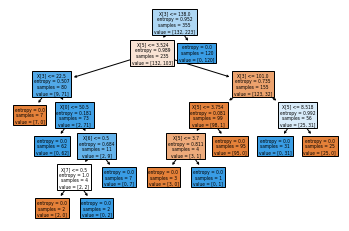

In [73]:
#colored in
from sklearn import tree
tree.plot_tree(entr_model,filled=True);

In [74]:
entr_model.classes_

array(['No', 'Yes'], dtype=object)

In [75]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [76]:
X_dum.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Online_1', 'Gender_Male'],
      dtype='object')

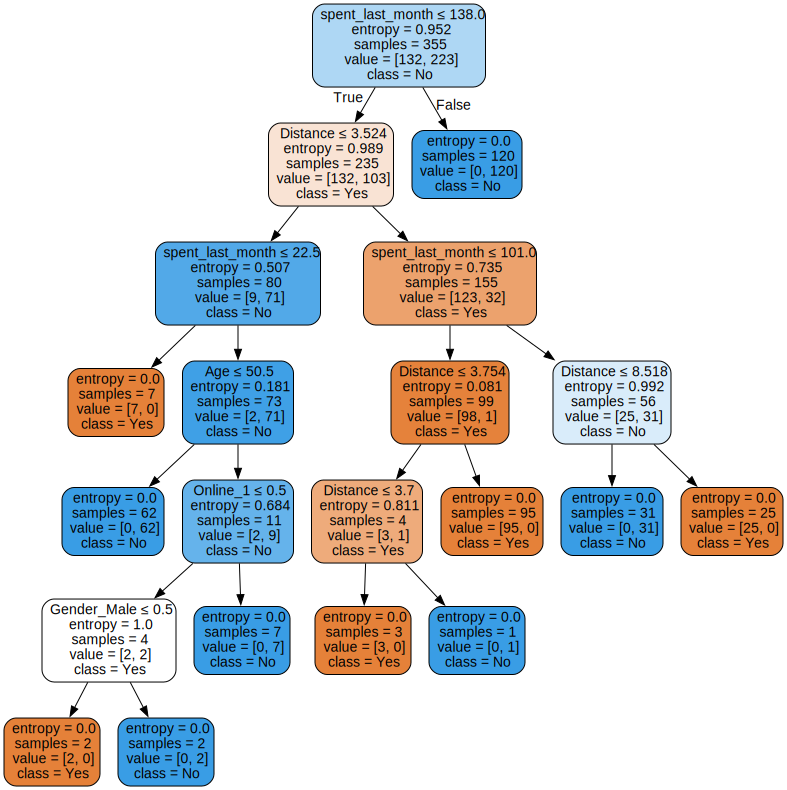

In [77]:
import graphviz
coffee_tree = tree.export_graphviz(entr_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(coffee_tree)
graph

#LOL! coffee tree! is it a tree tho?? :P

In [78]:
graph.render("coffee")

'coffee.pdf'

In [79]:
from sklearn.tree import export_text
text_tree = export_text(entr_model.fit(X_train,y_train))#, feature_names=X_dum.columns) >> for some reason won't take this here, but worked in graphviz!?
text_tree

'|--- feature_3 <= 138.00\n|   |--- feature_5 <= 3.52\n|   |   |--- feature_3 <= 22.50\n|   |   |   |--- class: No\n|   |   |--- feature_3 >  22.50\n|   |   |   |--- feature_0 <= 50.50\n|   |   |   |   |--- class: Yes\n|   |   |   |--- feature_0 >  50.50\n|   |   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |   |--- feature_7 <= 0.50\n|   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- feature_7 >  0.50\n|   |   |   |   |   |   |--- class: Yes\n|   |   |   |   |--- feature_6 >  0.50\n|   |   |   |   |   |--- class: Yes\n|   |--- feature_5 >  3.52\n|   |   |--- feature_3 <= 101.00\n|   |   |   |--- feature_5 <= 3.75\n|   |   |   |   |--- feature_0 <= 26.50\n|   |   |   |   |   |--- class: Yes\n|   |   |   |   |--- feature_0 >  26.50\n|   |   |   |   |   |--- class: No\n|   |   |   |--- feature_5 >  3.75\n|   |   |   |   |--- class: No\n|   |   |--- feature_3 >  101.00\n|   |   |   |--- feature_5 <= 8.52\n|   |   |   |   |--- class: Yes\n|   |   |   |--- feature_5 >  8.52

In [80]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "No"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Model Entropy - no max depth
Accuracy: 0.9495798319327731
Balanced accuracy: 0.9362179487179487
Precision score for "Yes" 0.9512195121951219
Precision score for "No" 0.9459459459459459
Recall score for "Yes" 0.975
Recall score for "No" 0.8974358974358975


In [81]:
#oh wait - how does it know we're talking about THIS model if it's never referenced here??
#only say 'metrics'??? just assumes it's whatever thing we did last from the library??
#OHHH, well, it's just going based off of y_test & y_pred!!! so whatever you have saved for/to
#those!!!!!

In [82]:
gini_model = DecisionTreeClassifier() #default is gini!
#max_depth default is None which is what we want!

gini_model.fit(X_train,y_train)

y_predg = gini_model.predict(X_test)
#>>REALLY NO NEED FOR THIS IF WE'RE JUST GETTING SCORE ANYWAY!!?
#oh it comes into play later just w/ the way they get the score metrics

gini_model.score(X_test,y_test)

0.9327731092436975

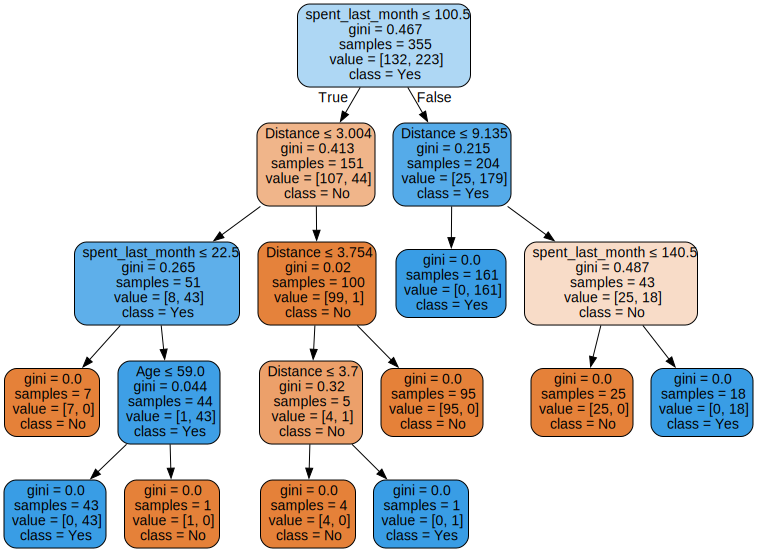

In [83]:
coffee_treeg = tree.export_graphviz(gini_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg = graphviz.Source(coffee_treeg)
graphg

In [84]:
graphg.render('coffee_tree_geenee')

'coffee_tree_geenee.pdf'

In [85]:
# Run this block for model evaluation
print("Model Gini impurity model") #add / clarify "no max depth" like case0?
print("Accuracy:", metrics.accuracy_score(y_test,y_predg))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg))
print('Precision score' , metrics.precision_score(y_test,y_predg, pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_predg, pos_label = "No"))

Model Gini impurity model
Accuracy: 0.9327731092436975
Balanced accuracy: 0.9171474358974359
Precision score 0.9390243902439024
Recall score 0.8717948717948718


In [86]:
entr_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

entr_model2.fit(X_train,y_train)

y_pred_e2 = entr_model2.predict(X_test)

entr_model2.score(X_test,y_test)

0.9243697478991597

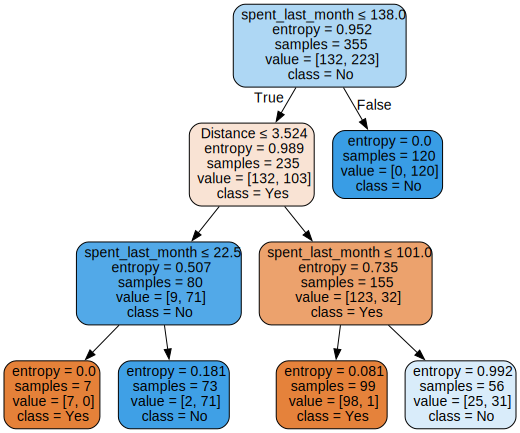

In [87]:
coffee_tree_e2 = tree.export_graphviz(entr_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph_e2 = graphviz.Source(coffee_tree_e2)
graph_e2

In [88]:
#okay aH so yeah i guess this is 3 levels of decisions! tree depth of 3!
#note that it's 4 'levels' from the look of it, but you gotta look at the 'GAPS'! like it's
#3 sets of DECISIONS!

#btw, in unrestricted aka NO max depth specified, we had a depth of *6*, for
#gini, aka 7 'apparent' levels & 6 levels of *decisions*!!!
#for entropy, it was one less; depth of 5: 6 apparent, 5 decisions

In [89]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_e2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_e2))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred_e2, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred_e2, pos_label = "No"))

Model Entropy model max depth 3
Accuracy: 0.9243697478991597
Balanced accuracy: 0.8977564102564102
Precision score for "Yes" 0.9176470588235294
Recall score for "No" 0.8205128205128205


In [90]:
gini_model2 = DecisionTreeClassifier(max_depth=3)

gini_model2.fit(X_train,y_train)

y_predg2 = gini_model2.predict(X_test)

gini_model2.score(X_test,y_test)

0.9411764705882353

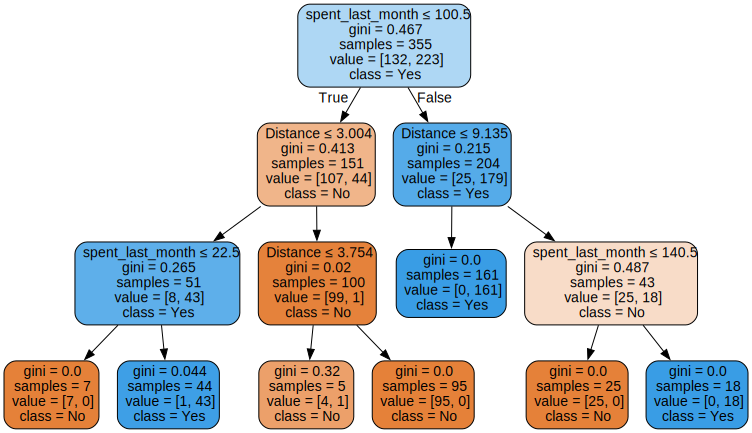

In [91]:
coffee_treeg2 = tree.export_graphviz(gini_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model2.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg2 = graphviz.Source(coffee_treeg2)
graphg2

In [92]:
print("Gini impurity model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_predg2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg2))
print('Precision score:', metrics.precision_score(y_test,y_predg2, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_predg2, pos_label = "No"))

#lol man annoying, why is their formatting so inconsitent/sloppy? quotes, spaces, colons, etc! on top of other issues mentioned!

Gini impurity model - max depth 3
Accuracy: 0.9411764705882353
Balanced accuracy: 0.9299679487179487
Precision score: 0.9506172839506173
Recall score: 0.8974358974358975


In [93]:
#hain??? they don't even say anything about it??? naa before naa after??
dot_data = StringIO()

#docs: "The StringIO module is an in-memory file-like object. This object can be used as input or output
#to the most function that would expect a standard file object. When the StringIO object is
#created it is initialized by passing a string to the constructor. If no string is passed the
#StringIO will start empty. In both cases, the initial cursor on the file starts at zero."


#DID WE EVER EVEN USE THIS?!?

In [94]:
#let's see the 'decision surface' plots!
#aka the DC scatterplots of each combo of features!

# #hmmmm not sure how to do w/ this...

# from sklearn.inspection import DecisionBoundaryDisplay

# # Parameters
# n_classes = 2
# plot_colors = "ryb"
# plot_step = 0.02

# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
#     # We only take the two corresponding features
#     X = coffeeData.data[:, pair]
#     y = coffeeData.Decision

#     # Train
#     gini2_fit = gini_model2.fit(X_train,y_train)

#     # Plot the decision boundary
#     ax = plt.subplot(2, 3, pairidx + 1)
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#     DecisionBoundaryDisplay.from_estimator(
#         gini2_fit,
#         X,
#         cmap=plt.cm.RdYlBu,
#         response_method="predict",
#         ax=ax,
#         xlabel=iris.feature_names[pair[0]],
#         ylabel=iris.feature_names[pair[1]],
#     )

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(
#             X[idx, 0],
#             X[idx, 1],
#             c=color,
#             label=iris.target_names[i],
#             cmap=plt.cm.RdYlBu,
#             edgecolor="black",
#             s=15,
#         )

# #lol "sup"title??
# plt.suptitle("Decision surface of decision trees trained on pairs of features")
# plt.legend(loc="lower right", borderpad=0, handletextpad=0)
# _ = plt.axis("tight")

In [95]:
NOPrediction.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [96]:
coffeeData.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [97]:
features_cols = features
new_X = Prediction.drop('Decision',axis=1) #we did the same thing w/ NOPrediction when we made X!
new_X = pd.get_dummies(new_X,columns=binary_features,drop_first=True)

new_X

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online_1,Gender_Male
1,24,0,44,164,74035,0.520906,0,1
3,20,0,30,107,13166,0.932098,1,1
7,24,0,20,34,17425,1.193188,0,0
11,24,0,40,153,84803,1.655096,1,0
12,21,0,38,122,42338,1.714179,1,0
...,...,...,...,...,...,...,...,...
673,66,5,0,52,55227,5.984716,0,0
677,67,5,41,151,182058,6.288700,1,1
680,24,5,62,205,55772,6.583449,1,0
682,33,5,34,96,78058,6.723241,0,0


In [98]:
#using our supposed 'best' model to predict the unknowns so we can tally up the
#ENTIRE voting percentage for indication of YES will buy the new coffee if they get it!
new_X['potential_buyers'] = gini_model2.predict(new_X)
new_X.potential_buyers.value_counts()

Yes    177
No      51
Name: potential_buyers, dtype: int64

In [99]:
#let's put it all together!

new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts()

Yes    480
No     222
dtype: int64

In [100]:
NOPrediction.Decision.value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

In [101]:
( new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts() ) / len(coffeeData)

Yes    0.683761
No     0.316239
dtype: float64

In [102]:
#ohhhhhh shrimp! just under 70!!!!! what ever will they do!?!?!?

In [103]:
#another way
( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)

0.6837606837606838

In [104]:
#this is what they said to do but didn't work??
new_X.potential_buyers.unique(return_counts=True)
#weird... online it does confirm return counts is an arg... but doesn't recognize here...
#tried [''] column ref way too, same thing. also tried as .values but then says
#numpy.ndarray object has no attribute unique!!!

TypeError: unique() got an unexpected keyword argument 'return_counts'

In [105]:
new_X.potential_buyers.unique()

array(['Yes', 'No'], dtype=object)

In [106]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
rate = ( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)
pct = rate*100
"{:.2f}% of customers want to buy Hidden Farm coffee, according to our best model.".format(pct)

'68.38% of customers want to buy Hidden Farm coffee, according to our best model.'

In [107]:
#decision trees tell you about each INDIVIDUAL case

#but we technically ALREADY MADE a decision tree lol for ourselves! for this - if >70% say yes -
#actual and predicted - then STRIKE THE DEAL!! if less/equal, THEN NO DEAL!!!!!!

In [108]:
#but wait - so it's not like a marble drop down the shutes & ladders... like for a GIVEN decision
#tree, and a GIVEN set of test data, it IS deterministic no?? like it's got a HARD, DEFINED set of
#rules right so it MUST give the SAME answers every time!!!????
################################################################################################

In [109]:
#so let's do random forest aka an ensemble method and average a BUNCH of different overfit models?!
#let's see what AVERAGE percentage we get from SEVERAL models!! then we can much more confidently
#make a hard decision from THAT average of MANY models/simulations!!! rather than putting all our eggs
#in one basket!

In [110]:
#reminder
X_train

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online_1,Gender_Male
450,25,3,54,170,51644,10.873763,1,1
129,23,1,21,51,80144,4.990330,1,1
565,59,4,30,112,69515,9.409150,1,1
341,16,3,31,70,3526,1.125406,1,0
523,23,4,41,148,59993,4.815908,1,0
...,...,...,...,...,...,...,...,...
193,35,1,0,41,16288,10.694807,0,0
101,54,1,51,165,56572,3.005885,0,0
307,53,2,39,129,44192,9.186539,0,1
568,40,4,25,95,71606,9.728074,0,0


In [111]:
firstRFModel = RandomForestClassifier(max_depth=3,random_state=33) #default gini
firstRFModel.fit(X_train,y_train)
new_X_rf = new_X.drop('potential_buyers',axis=1)
new_X_rf['potential_buyers_rf'] = firstRFModel.predict(new_X_rf)
( sum(new_X_rf.potential_buyers_rf == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)

#wait just realized - why random state for the model? we didn't do that before
#w/ any of the other models???
#OHHH! CUZ *RANDOM* FOREST RIGHT!!! LOL! so w/ random forest, it's doing like
#bootstrapping so it's gonna be different every time!!! so if you save the random
#state then it can REPLICATE those results!!!
####################################################################################
#ohh wait! also just realized tho - i thought the idea in random forest WAS for us
#to like perfectly overfit since we're gonna be bootstrapping & averaging!?!
#so then why put a max depth??? i guess then we DON'T wanna perfectly overfit??
#but rather still do what we'd do on a normal, SINGLE decision tree??
####################################################################################

0.6951566951566952

In [112]:
#lol owh KAAAAAMMMMMM AANNNNNNN!!!!!

In [113]:
#let's see how many more were predicted as yessirs!
new_X_rf.potential_buyers_rf.value_counts()
#JUST 5 MORE!!!

Yes    185
No      43
Name: potential_buyers_rf, dtype: int64

In [114]:
#and i guess there's no like SINGLE tree then ofc we can view cuz it's a FOREST

#BUT HOW DOES IT COME UP WITH THE INDIVIDUAL TREES??? LIKE IS IT DOING A KIND OF 'kFold
#Cross-Validation'??? where it breaks it up into several different subsets (aka NO OVERLAP)?
#OR WAIT NO! that would only do a few. i mean we could do that if we're comparing like dif
#models like gini vs entropy2 etc, but this remem does all ONE way/method! so this must do what
#we learned in the video of BOOTSTRAPPING!!!!! so it overfits each INDIVIDUAL one and then AVERAGES
#THEM OUT! to get a very accurate predictor!

#is there any way to see these individual trees? i guess it'd be too many

#and how many trees is it making for this forest??


##################################################################################################

In [115]:
#oh wait! but what's our score of this rf predictor??

firstRFModel.score(X_test,y_test)

0.9159663865546218

In [116]:
#ummm.... they made it sound like this would be 1000% accuracy... lol... again, the first / simplest one did best!...

In [ ]:
#All In One
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
coffeeData = pd.read_csv('data/RRDinerCoffeeData.csv')
coffeeData.head()
coffeeData.shape
coffeeData.info()
coffeeData.describe()
coffeeData.columns
coffeeData.columns=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Online', 'Decision']
coffeeData.head()
coffeeData.columns
coffeeData.Gender.value_counts()
coffeeData.Gender.unique()
mapping={'female':'Female', 'F':'Female', 'f ':'Female', 'FEMALE':'Female', 'MALE':'Male', 'male':'Male',
       'M':'Male'}

coffeeData.Gender = coffeeData.Gender.replace(mapping)
coffeeData.Gender.unique()
coffeeData.Decision.value_counts()
coffeeData.Decision.unique()
mapping = {1:'Yes', 0:'No'}
coffeeData.Decision = coffeeData.Decision.replace(mapping)
coffeeData.Decision.value_counts()
coffeeData.Decision.unique()
NOPrediction = coffeeData.dropna()
NOPrediction.Decision.unique()
coffeeData.Decision.unique()
NOPrediction.info()
coffeeData.Decision.isnull().sum()
len(coffeeData)-coffeeData.Decision.value_counts().sum()
coffeeData.Decision.value_counts().sum()
NOPrediction.columns
features=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online']
pali = ['g','r']

features_cont=['Age', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance']

for feature in features_cont:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();
NOPrediction.Gender.value_counts(normalize=True)
NOPrediction.Decision.value_counts(normalize=True)
coffeeData.Decision.value_counts(normalize=True)
set(features) - set(features_cont)
type(set(features) - set(features_cont))
list(set(features) - set(features_cont))
#won't work here! only for dicts? #although ironic cuz output of SET is curly braces so LOOKS like a dict!!
features.difference(features_cont)
NOPrediction.columns
#OH! and then we can show the BINARY ones w/ a diff way! simple bar charts!

binary_features = list(set(features) - set(features_cont))

for binary_feature in binary_features:
    sns.countplot(data=NOPrediction,x=binary_feature, hue='Decision', palette=pali)
    plt.show()

#NOTE!!!! when X *IS* decision then we DON'T NEED HUE!!! just put in palette!!!
#BUT THEN THE ONLY DIFF IS YOU WON'T GET THAT NICE *LEGEND*!!!!
Prediction = coffeeData[coffeeData['Decision'].isnull()]
Prediction
X = NOPrediction.drop('Decision',axis=1)
y = NOPrediction.Decision
X
y
#keeping X's separate from y's since need it like that for train/test split!
X_dum = pd.get_dummies(X, columns = binary_features, drop_first=True)

X_dum
#we could've just converted Online to string yes/no too like we did with Decision,
#then it would've AUTOMATICALLY DETECTED IT and we could've left columns blank!
#gender is already fine cuz string!
#OR - since these are BOTH binary anyway, the other option is make them BOTH numerical
#binary 0/1, so Online already is, so could've converted male/female to 1/0 too!
#then wouldn't have to dummify???
#################################################
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=33)
X_train
y_train
X_train.shape
NOPrediction.describe()
Prediction.describe()
#oh! notice gender is missing cuz it's *TEXT* AND NOT NUMERICAL!
###############################################################################################
sns.boxplot(data=NOPrediction, x='Decision', y='spent_last_week', hue='Decision', palette=pali);
sns.scatterplot(data=NOPrediction, x='Distance', y='spent_last_month', hue='Decision', palette=pali);
features_focus=['spent_last_month', 'Distance', 'Age', 'salary']

for feature in features_focus:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();
X_train[y_train=='No'].spent_last_month.max()
X_train[y_train=='Yes'].spent_last_month.median()
#do another one for IQRs!!!
####keep in mind that there's the OVERALL data, but then there's the TRAINING ONLY
#data that our model is gonna see and fit on, perfectly in fact in unrestrained /
#no max depth editions! thus, don't take the cuts/cutmarks TOO literally when you look
#at the decision tree cuz it DEPENDS WHAT POINTS *TRAINING* SPLIT GOT!!!!!!
#you can look at the boxplots & scatts of those separately if you want!
#here's a start:
# trainers = X_train.copy()
# trainers['Decision']=y_train
# trainers.head()
# sns.boxplot(data=trainers, x='Decision', y='Distance', hue='Decision', palette=pali);
#more scatts!
sns.scatterplot(data=NOPrediction, x='spent_last_week', y='spent_last_month', hue='Decision', palette=pali);
#ahhhh interesting! so yeah, like we said, THESE TWO ARE PROBABLY/EXPECTEDLY
#HIGHLY CORRELATED!!! if you spent more last week, you probably spent more
#last MONTH! in some cases, last week WAS last month LOL!
#the separation you see is like the same you see in either ONE of them
#individually! aka the more you spent, the more likely you were to indicate Yes!
sns.scatterplot(data=NOPrediction, x='Age', y='spent_last_month', hue='Decision', palette=pali);
#hmm interesting! it's like an upside down 'L' shape! like square within a square!
#<age 23 & >$138 spent last month said Yes!!!
sns.scatterplot(data=NOPrediction, x='Age', y='Distance', hue='Decision', palette=pali);
#hmm interesting! like another L shape, but actually, mostly just the lower
#left block said yes! you can box that up w/ only a few exceptions!
#young & close!!!
#the youngest ALL said yes, and the closest ALMOST all said yes!!!
############################################################################
sns.scatterplot(data=NOPrediction, x='salary', y='spent_last_month', hue='Decision', palette=pali);
#okay so another 'L', the PISTOL FIGURE!!! so, from bottom left/origin,
#like angling up and right, then SHARP right turn lol, so basically, ENTIRE TOP block,
#without exception, so >$138 spent, *ALL* income brackets, regardless of how rich
#or poor, said yes! ppl are mostly in the 25k to 80k range to begin with;
#and then beneath that spenditure, interestingly it's the ones who make the LEAST
#that said yes!!! makes sense tho that the less they make, the less they tend
#to spend. lot of mixing, but the LOWEST earners said yes REGARDLESS OF HOW
#MUCH THEY SPENT! seems a little strange that even those who didn't spend anything
#in the last month were saying they would - but it was a mix; but as expected,
#it was more common to say NO then yes for the low SPENDERS, but perhaps
#more common to say yes than no for low EARNERS!!! but yeah, interestingly the
#LOWEST spenders said yes!? too happy-go-lucky lol
sns.scatterplot(data=NOPrediction, x='salary', y='Distance', hue='Decision', palette=pali);
#okay cool - pretty good division! NE/SW line! would have to do a pixely
#jagged back n forth chisel, up/right up/right lol TO BE UPRIGHT! upward & onward
#but everyone >$85k salary, without exception, said yes. and then that block/box
#to low-left of that line, like down to $35k salary and up to 4.1miles distance!
from sklearn.tree import DecisionTreeClassifier
entr_model = DecisionTreeClassifier(criterion='entropy')
#max_depth default is None which is what we want!

# Call fit() on entr_model
entr_model.fit(X_train,y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# See how we did
entr_model.score(X_test,y_test)
entr_model.score(X_train,y_train)
#####################################################################################
#OHHHHH DAANNNNNNNNGGGGGG DANIYAALLLL!!!!! sA so IT ACTUALLY DID COMPLETELY OVERFIT!!!
#YET, DIDN'T SEEM TO BE AN ISSUE CUZ STILL GOT AMAZING SCORE!!!! sA!!!!! DIDN'T EVEN DO
#OTHER TREES/ENSEMBLE/FOREST!!!!! no tweakers/averaging!!!! is this just a really easy case!?
#so THAT'S WHY ENTROPY WAS 0 IN EACH LEAF/FINAL BUCKET!!!
#####################################################################################
#plain vanilla
from sklearn import tree
tree.plot_tree(entr_model);
#colored in
from sklearn import tree
tree.plot_tree(entr_model,filled=True);
entr_model.classes_
y.unique()
X_dum.columns
import graphviz
coffee_tree = tree.export_graphviz(entr_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(coffee_tree)
graph

#LOL! coffee tree! is it a tree tho?? :P
graph.render("coffee")
from sklearn.tree import export_text
text_tree = export_text(entr_model.fit(X_train,y_train))#, feature_names=X_dum.columns) >> for some reason won't take this here, but worked in graphviz!?
text_tree
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "No"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "No"))
#oh wait - how does it know we're talking about THIS model if it's never referenced here??
#only say 'metrics'??? just assumes it's whatever thing we did last from the library??
#OHHH, well, it's just going based off of y_test & y_pred!!! so whatever you have saved for/to
#those!!!!!

gini_model = DecisionTreeClassifier() #default is gini!
#max_depth default is None which is what we want!

gini_model.fit(X_train,y_train)

y_predg = gini_model.predict(X_test)
#>>REALLY NO NEED FOR THIS IF WE'RE JUST GETTING SCORE ANYWAY!!?
#oh it comes into play later just w/ the way they get the score metrics

gini_model.score(X_test,y_test)
coffee_treeg = tree.export_graphviz(gini_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg = graphviz.Source(coffee_treeg)
graphg
graphg.render('coffee_tree_geenee')
# Run this block for model evaluation
print("Model Gini impurity model") #add / clarify "no max depth" like case0?
print("Accuracy:", metrics.accuracy_score(y_test,y_predg))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg))
print('Precision score' , metrics.precision_score(y_test,y_predg, pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_predg, pos_label = "No"))

entr_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

entr_model2.fit(X_train,y_train)

y_pred_e2 = entr_model2.predict(X_test)

entr_model2.score(X_test,y_test)
coffee_tree_e2 = tree.export_graphviz(entr_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph_e2 = graphviz.Source(coffee_tree_e2)
graph_e2
#okay aH so yeah i guess this is 3 levels of decisions! tree depth of 3!
#note that it's 4 'levels' from the look of it, but you gotta look at the 'GAPS'! like it's
#3 sets of DECISIONS!

#btw, in unrestricted aka NO max depth specified, we had a depth of *6*, for
#gini, aka 7 'apparent' levels & 6 levels of *decisions*!!!
#for entropy, it was one less; depth of 5: 6 apparent, 5 decisions
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_e2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_e2))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred_e2, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred_e2, pos_label = "No"))

gini_model2 = DecisionTreeClassifier(max_depth=3)

gini_model2.fit(X_train,y_train)

y_predg2 = gini_model2.predict(X_test)

gini_model2.score(X_test,y_test)
coffee_treeg2 = tree.export_graphviz(gini_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model2.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg2 = graphviz.Source(coffee_treeg2)
graphg2
print("Gini impurity model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_predg2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg2))
print('Precision score:', metrics.precision_score(y_test,y_predg2, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_predg2, pos_label = "No"))

#lol man annoying, why is their formatting so inconsitent/sloppy? quotes, spaces, colons, etc! on top of other issues mentioned!
#hain??? they don't even say anything about it??? naa before naa after??
dot_data = StringIO()

#docs: "The StringIO module is an in-memory file-like object. This object can be used as input or output
#to the most function that would expect a standard file object. When the StringIO object is
#created it is initialized by passing a string to the constructor. If no string is passed the
#StringIO will start empty. In both cases, the initial cursor on the file starts at zero."


#DID WE EVER EVEN USE THIS?!?

#let's see the 'decision surface' plots!
#aka the DC scatterplots of each combo of features!

# #hmmmm not sure how to do w/ this...

# from sklearn.inspection import DecisionBoundaryDisplay

# # Parameters
# n_classes = 2
# plot_colors = "ryb"
# plot_step = 0.02

# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
#     # We only take the two corresponding features
#     X = coffeeData.data[:, pair]
#     y = coffeeData.Decision

#     # Train
#     gini2_fit = gini_model2.fit(X_train,y_train)

#     # Plot the decision boundary
#     ax = plt.subplot(2, 3, pairidx + 1)
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#     DecisionBoundaryDisplay.from_estimator(
#         gini2_fit,
#         X,
#         cmap=plt.cm.RdYlBu,
#         response_method="predict",
#         ax=ax,
#         xlabel=iris.feature_names[pair[0]],
#         ylabel=iris.feature_names[pair[1]],
#     )

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(
#             X[idx, 0],
#             X[idx, 1],
#             c=color,
#             label=iris.target_names[i],
#             cmap=plt.cm.RdYlBu,
#             edgecolor="black",
#             s=15,
#         )

# #lol "sup"title??
# plt.suptitle("Decision surface of decision trees trained on pairs of features")
# plt.legend(loc="lower right", borderpad=0, handletextpad=0)
# _ = plt.axis("tight")

NOPrediction.Decision.value_counts(normalize=True)
coffeeData.Decision.value_counts(normalize=True)

features_cols = features
new_X = Prediction.drop('Decision',axis=1) #we did the same thing w/ NOPrediction when we made X!
new_X = pd.get_dummies(new_X,columns=binary_features,drop_first=True)

new_X
#using our supposed 'best' model to predict the unknowns so we can tally up the
#ENTIRE voting percentage for indication of YES will buy the new coffee if they get it!
new_X['potential_buyers'] = gini_model2.predict(new_X)
new_X.potential_buyers.value_counts()
#let's put it all together!

new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts()
NOPrediction.Decision.value_counts()
( new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts() ) / len(coffeeData)
#ohhhhhh shrimp! just under 70!!!!! what ever will they do!?!?!?
#another way
( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)
#this is what they said to do but didn't work??
new_X.potential_buyers.unique(return_counts=True)
#weird... online it does confirm return counts is an arg... but doesn't recognize here...
#tried [''] column ref way too, same thing. also tried as .values but then says
#numpy.ndarray object has no attribute unique!!!
new_X.potential_buyers.unique()
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
rate = ( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)
pct = rate*100
"{:.2f}% of customers want to buy Hidden Farm coffee, according to our best model.".format(pct)

#decision trees tell you about each INDIVIDUAL case

#but we technically ALREADY MADE a decision tree lol for ourselves! for this - if >70% say yes -
#actual and predicted - then STRIKE THE DEAL!! if less/equal, THEN NO DEAL!!!!!!
#but wait - so it's not like a marble drop down the shutes & ladders... like for a GIVEN decision
#tree, and a GIVEN set of test data, it IS deterministic no?? like it's got a HARD, DEFINED set of
#rules right so it MUST give the SAME answers every time!!!????
################################################################################################
#so let's do random forest aka an ensemble method and average a BUNCH of different overfit models?!
#let's see what AVERAGE percentage we get from SEVERAL models!! then we can much more confidently
#make a hard decision from THAT average of MANY models/simulations!!! rather than putting all our eggs
#in one basket!
#reminder
X_train
firstRFModel = RandomForestClassifier(max_depth=3,random_state=33) #default gini
firstRFModel.fit(X_train,y_train)
new_X_rf = new_X.drop('potential_buyers',axis=1)
new_X_rf['potential_buyers_rf'] = firstRFModel.predict(new_X_rf)
( sum(new_X_rf.potential_buyers_rf == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)

#wait just realized - why random state for the model? we didn't do that before
#w/ any of the other models???
#OHHH! CUZ *RANDOM* FOREST RIGHT!!! LOL! so w/ random forest, it's doing like
#bootstrapping so it's gonna be different every time!!! so if you save the random
#state then it can REPLICATE those results!!!
####################################################################################
#ohh wait! also just realized tho - i thought the idea in random forest WAS for us
#to like perfectly overfit since we're gonna be bootstrapping & averaging!?!
#so then why put a max depth??? i guess then we DON'T wanna perfectly overfit??
#but rather still do what we'd do on a normal, SINGLE decision tree??
####################################################################################
#lol owh KAAAAAMMMMMM AANNNNNNN!!!!!
#let's see how many more were predicted as yessirs!
new_X_rf.potential_buyers_rf.value_counts()
#JUST 5 MORE!!!
#and i guess there's no like SINGLE tree then ofc we can view cuz it's a FOREST

#BUT HOW DOES IT COME UP WITH THE INDIVIDUAL TREES??? LIKE IS IT DOING A KIND OF 'kFold
#Cross-Validation'??? where it breaks it up into several different subsets (aka NO OVERLAP)?
#OR WAIT NO! that would only do a few. i mean we could do that if we're comparing like dif
#models like gini vs entropy2 etc, but this remem does all ONE way/method! so this must do what
#we learned in the video of BOOTSTRAPPING!!!!! so it overfits each INDIVIDUAL one and then AVERAGES
#THEM OUT! to get a very accurate predictor!

#is there any way to see these individual trees? i guess it'd be too many

#and how many trees is it making for this forest??


##################################################################################################
#oh wait! but what's our score of this rf predictor??

firstRFModel.score(X_test,y_test)
#ummm.... they made it sound like this would be 1000% accuracy... lol... again, the first / simplest one did best!...